In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
##REad the dataset
df=pd.read_csv('height-weight.csv')
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'height')

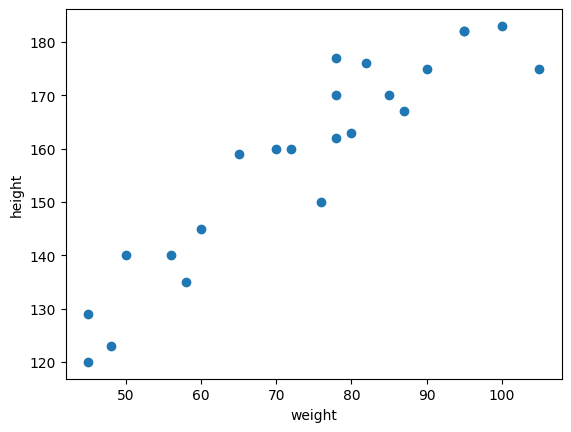

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('height')

In [7]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [23]:
x = df[['Weight']]
y = df['Height']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

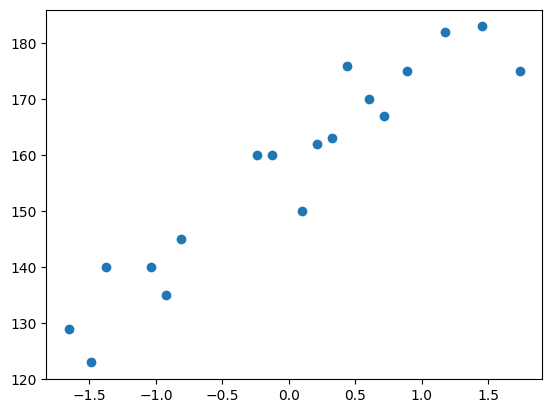

In [29]:
plt.scatter(x_train,y_train)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regressor = LinearRegression()

In [32]:
regressor.fit(x_train,y_train)

LinearRegression()

In [33]:
regressor.coef_

array([17.03440872])

In [34]:
regressor.intercept_

157.5

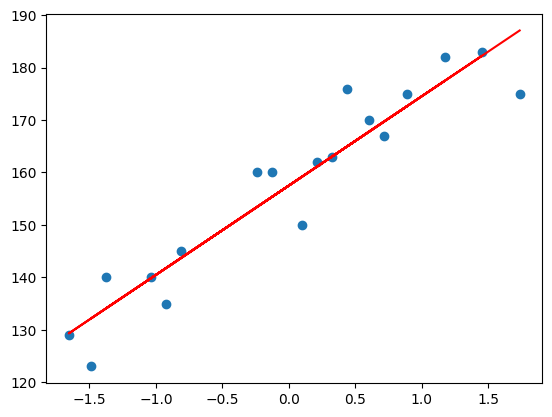

In [39]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

In [41]:
y_pred_test=regressor.predict(x_test)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

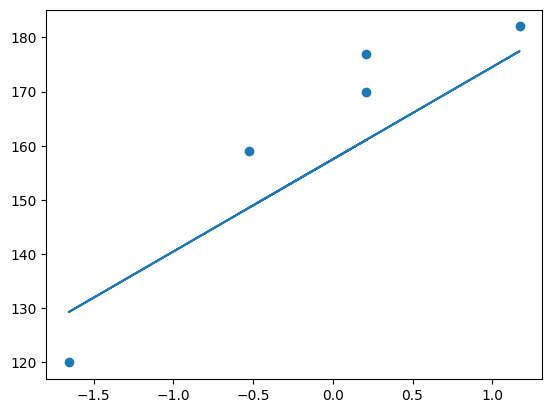

In [43]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test))

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [46]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse,mae,rmse)

109.77592599051664 9.822657814519232 10.477400726827081


In [47]:
from sklearn.metrics import r2_score

In [48]:
score = r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


In [50]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231252

In [51]:
regressor.predict(scaler.transform([[75]]))

C:\Users\Rajpurohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.19553315])

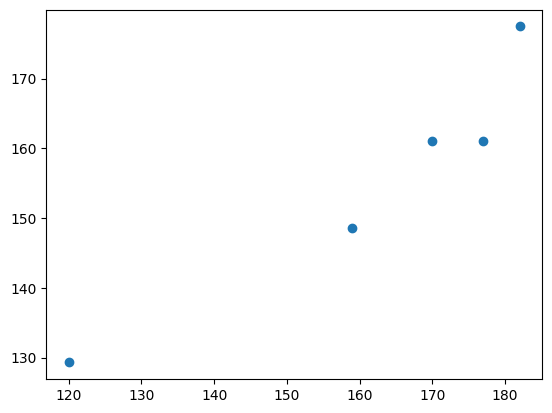

In [52]:
plt.scatter(y_test,y_pred_test)

In [53]:
residuals=y_test-y_pred_test

residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

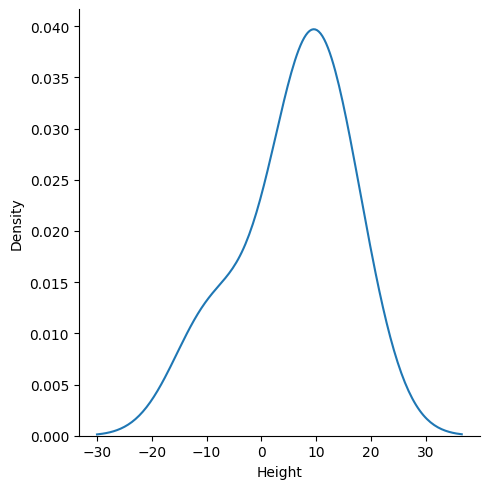

In [54]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kind="kde")

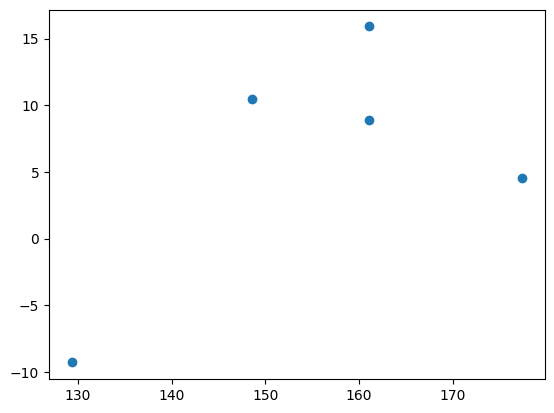

In [55]:

## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

In [56]:
import statsmodels.api as sm

In [60]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test) 
predictions

array([  3.58467086,   3.58467086, -28.1958439 ,  19.95645118,
        -8.93492586])

In [61]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Sun, 11 Aug 2024   Prob (F-statistic):                       0.661
Time:                        16:08:22   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Rajpurohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [62]:
regressor.coef_

array([17.03440872])